--- 
Project for the course in Microeconometrics | Summer 2021, M.Sc. Economics, Bonn University | [Philipp Schreiber](https://github.com/pcschreiber1)

# Replication of Henderson, Storeygard, Deichmann (2017) :
## Has climate change driven urbanization in Africa? <a class="tocSkip">   
    
    
---

##### Downloading and viewing this notebook:

* The original paper, as well as the data and code provided by the authors can be accessed [here](https://doi.org/10.1016/j.jdeveco.2016.09.001).

## Content:
Extension: 
 - Spatial SUTVA/
 - Spatially explicit counterfactual framework
     - using exploration of SUTVA and spatial patters
         - spatial autocorrelation: Moran Plot and Moran's I
     - implementing (lagged dependent, lagged 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

pd.options.display.float_format = "{:,.2f}".format

ModuleNotFoundError: No module named 'statsmodels'

In [33]:
from auxiliary.data_import import *

ModuleNotFoundError: No module named 'statsmodels'

### Region data (table 1a and 2)

In [ ]:
%whos

In [ ]:
regiondata = importing_regiondata()
#regiondata = regiondata.query("abspctileADsm0_2moistu > 6 & abspctileADurbfrac > 6")

a = table_1_a(regiondata)
regiondata[["ADurbfrac", "ADsm0_1moistu", "ADsm0_2moistu", "extent_agE_ADsm0_2moistu", "countryyear", "afruid"]].head()

In [ ]:
table_2(regiondata).params[["ADsm0_2moistu", "firsturbfrac",  "lndiscst"]]

In [ ]:
df_subgroup = regiondata[["isoyr", "iso3v10", "province"]]
df_subgroup.loc[(slice(20,30))]

## Exploring countrydata and reproducing Figure 4 (Variability in climate change in Africa)

In [ ]:
countrydata_allyears = pd.read_stata("data/countrydata_allyears.dta")

countrydata_allyears["sm0_2normarid"] = countrydata_allyears["sm0_2moistu"]/ countrydata_allyears["mean_moistu1950_69"]

In [ ]:
countrydata_allyears.head()

In [ ]:
countrydata_allyears = pd.read_stata("data/countrydata_allyears.dta")
figure_4(countrydata_allyears)

### Exploring City data and reproducing table 6 (Change in city output and rainfall: heterogeneity by industrialization)

In [2]:
citydata = pd.read_stata("data/citydata.dta")
#citydata[["iso3v10", "year", "dlnrain30", "dlnl1", "agidison"]]
citydata.head()

,iso3v10,agidison,extent_agE,extent_agH,year,rain30,cityavgrain1983_1991,rain30trim257,cityavgrain1983_1991trim257,todn,...,extent_agHcflcnt3,extent_agHLcflcnt3,extent_agHcflcnt3_50,extent_agHLcflcnt3_50,extent_agH_dlnrainnatconflict,extent_agH_dlnrainLnatconflict,extent_agH_dlnraincflcnt3,extent_agH_dlnrainLcflcnt3,extent_agH_dlnraincflcnt3_50,extent_agH_dlnrainLcflcnt3_50
0,MRT,6082478,10.0,14.0,0.0,0.114573,0.208885,0.102139,0.118817,851.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MRT,6082478,10.0,14.0,1.0,0.172423,0.208885,0.136067,0.118817,1170.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MRT,6082478,10.0,14.0,2.0,0.274160,0.208885,0.110756,0.118817,1073.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MRT,6082478,10.0,14.0,3.0,0.205255,0.208885,0.111414,0.118817,1359.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MRT,6082478,10.0,14.0,4.0,0.230683,0.208885,0.138960,0.118817,1457.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exploring Spatial regression in Python

In [1]:
import geopandas as gpd
import shapely.geometry as geom
import libpysal as lp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
citydata = pd.read_stata("data/citydata.dta")

In [3]:
#creating geopandas dataframe

citydata["geometry"] = citydata[["lon", "lat"]].apply(geom.Point, axis=1) #take each row
citydata = gpd.GeoDataFrame(citydata)
citydata.csr = "epsg:102113"

In [5]:
#Source https://africaopendata.org/dataset?tags=shapefiles
africa = gpd.read_file("C:/Projects/ose-data-science-course-project-pcschreiber1/data/afr_g2014_2013_0.shp")


In [6]:
africa.crs = "EPSG:4326"

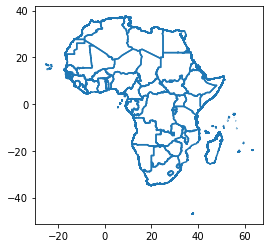

In [6]:
africa.boundary.plot()

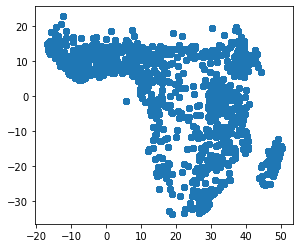

In [4]:
citydata.crs = "EPSG:4326"
citydata.plot()

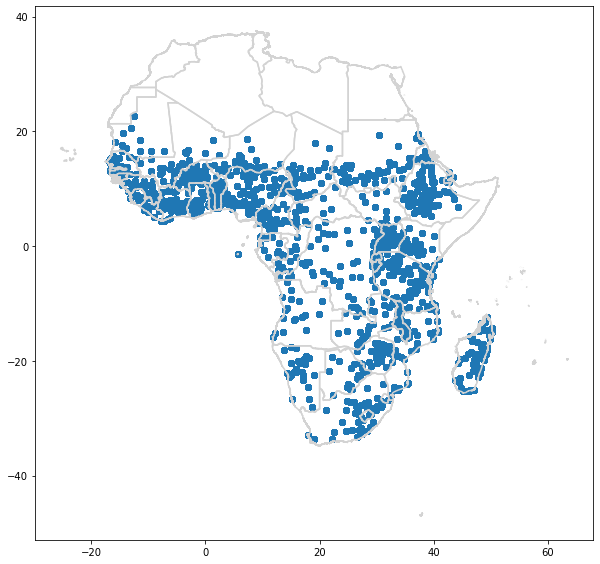

In [8]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_aspect('equal')
africa.boundary.plot(ax=ax, color='lightgrey')
citydata.to_crs(epsg=4326).plot(ax=ax)
plt.show()

#### Choropleth mapping

In [45]:
citydata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 19686 entries, 0 to 19685
Data columns (total 61 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   iso3v10                           19686 non-null  object  
 1   agidison                          19686 non-null  int32   
 2   extent_agE                        19686 non-null  float32 
 3   extent_agH                        19686 non-null  float32 
 4   year                              19686 non-null  float32 
 5   rain30                            19686 non-null  float32 
 6   cityavgrain1983_1991              19686 non-null  float32 
 7   rain30trim257                     19686 non-null  float32 
 8   cityavgrain1983_1991trim257       19686 non-null  float32 
 9   todn                              19686 non-null  float32 
 10  D_ag30                            19686 non-null  float32 
 11  natconflict                       19686 non-nu

AttributeError: 'NoneType' object has no attribute 'head'

mean Rain 30:  2.4140253
median Rain 30:  2.3007827


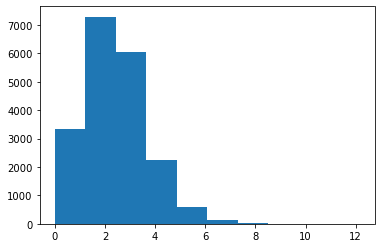

In [24]:
print("mean Rain 30: ", citydata["rain30"].mean())
print("median Rain 30: ", citydata["rain30"].median())
h = plt.hist(citydata["rain30"], bins=10)

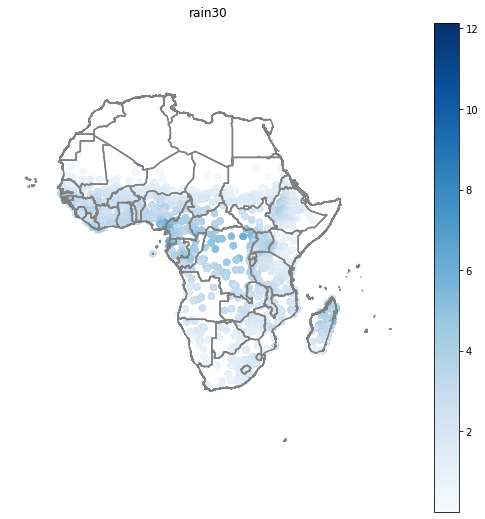

In [32]:
f, ax = plt.subplots(1, figsize=(9, 9))
africa.boundary.plot(ax=ax, color='grey')
citydata.plot(ax=ax, column='rain30', legend=True,  #, scheme='Quantiles', legend_kwds={'fmt':'{:.0f}'}, \
         cmap='Blues')
ax.set_axis_off()
ax.set_title('rain30')
plt.axis('equal')
plt.show()

#### Spatial patterns

In [7]:
regiondata = pd.read_stata("data/regiondata.dta")

In [13]:
#creating geopandas dataframe
regiondata["geometry"] = regiondata[["lon", "lat"]].apply(geom.Point, axis=1) #take each row
regiondata = gpd.GeoDataFrame(regiondata)
regiondata.csr = "EPSG:4326"

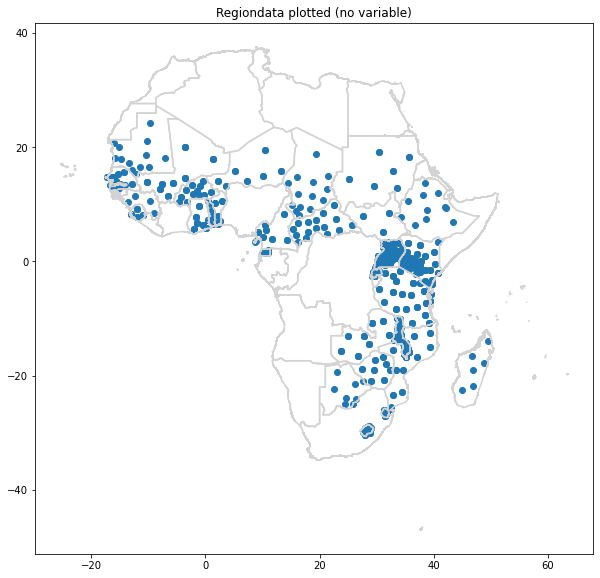

In [47]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_aspect('equal')
africa.boundary.plot(ax=ax, color='lightgrey')
regiondata.plot(ax=ax)
plt.title("Regiondata plotted (no variable)")
plt.show()

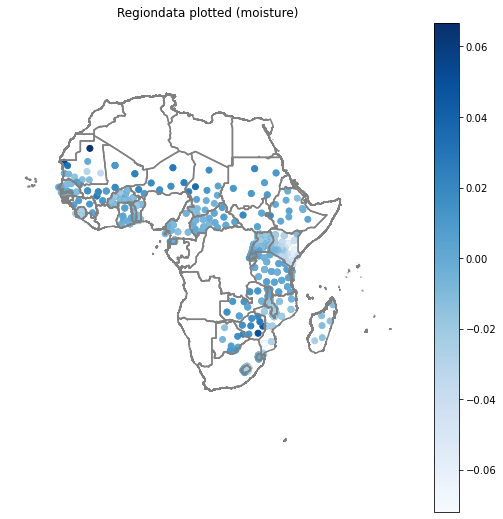

In [49]:
f, ax = plt.subplots(1, figsize=(9, 9))
africa.boundary.plot(ax=ax, color='grey')
regiondata.plot(ax=ax, column="ADsm0_2moistu", legend=True,  #, scheme='Quantiles', legend_kwds={'fmt':'{:.0f}'}, \
         cmap='Blues')
ax.set_axis_off()
ax.set_title('rain30')
plt.axis('equal')
plt.title("Regiondata plotted (moisture)")
plt.show()

 - chloropeth for analysing several dimensions

In [90]:
a = regiondata.columns
a = a[26:35]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 740
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   moistu         741 non-null    float32
 1   sm0_2preu      741 non-null    float32
 2   sm0_2tmpu      741 non-null    float32
 3   sm0_2petu      741 non-null    float32
 4   ADsm0_1moistu  741 non-null    float32
 5   ADsm0_1preu    741 non-null    float32
 6   ADsm0_1tmpu    741 non-null    float32
 7   ADsm0_1petu    741 non-null    float32
 8   ADsm0_2moistu  741 non-null    float32
dtypes: float32(9)
memory usage: 31.8 KB


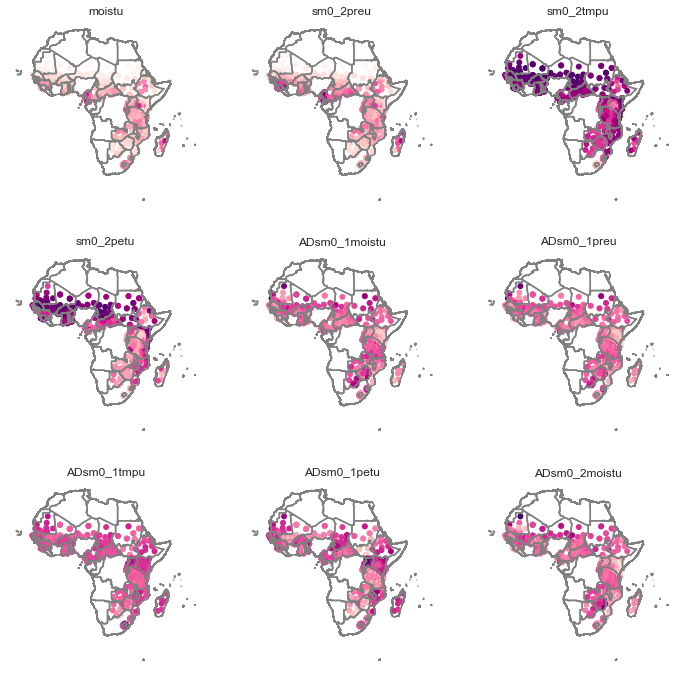

In [92]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(a):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    regiondata.plot(column=col, ax=ax, linewidth=0, cmap='RdPu')#, scheme='Quantiles', linewidth=0, cmap='RdPu')
    # Remove axis clutter
    africa.boundary.plot(ax=ax, color='grey')
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

### Spatial weights

In [95]:
w = lp.weights.KNN.from_dataframe(regiondata, k=8) #k nearest neighbour weights
w.tranform = "R" #row-standardization
regiondata['ADsm0_2moistu_lag'] = lp.weights.spatial_lag.lag_spatial(w, regiondata['ADsm0_2moistu'])

In [58]:
regiondata["iso3v10"]

0       BWA
1       BWA
2       BWA
3       BWA
4       BWA
       ... 
736    KEN2
737    KEN2
738    KEN2
739    KEN2
740    KEN2
Name: iso3v10, Length: 741, dtype: object

In [56]:
regiondata[["ADsm0_2moistu_lag",].head()

0    0.040837
1    0.070839
2    0.051633
3    0.021014
4    0.015584
Name: ADsm0_2moistu_lag, dtype: float64

In [67]:
regiondata.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            731, 732, 733, 734, 735, 736, 737, 738, 739, 740],
           dtype='int64', length=741)

 - Global Autocorrelation: Moran Plot and Moran's I (finding whether **there are** clusters)
     - Need either pysal "edas" or maybe can do Moran's I p-value with statsmodel?


<div class="alert alert-block alert-info"><b>Note:</b> Here the weights are constructed using k=8 nearest neighbors</div>

In [96]:
#standardize the original variable and the lag
regiondata['ADsm0_2moistue_std'] = ( regiondata['ADsm0_2moistu'] - regiondata['ADsm0_2moistu'].mean() )\
                    / regiondata['ADsm0_2moistu'].std()
regiondata['ADsm0_2moistu_lag_std'] = ( regiondata['ADsm0_2moistu_lag'] - regiondata['ADsm0_2moistu_lag'].mean() )\
                    / regiondata['ADsm0_2moistu_lag'].std()

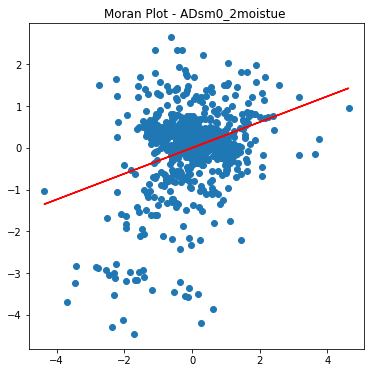

Moran's I: 0.308995


In [89]:
# moran = lp.esda.moran.Moran(regiondaata['ADsm0_2moistu'], w) #not available in libpysal

f, ax = plt.subplots(1, figsize=(6, 6))
plt.scatter(x='ADsm0_2moistue_std', y='ADsm0_2moistu_lag_std', data=regiondata)
m, b = np.polyfit(x=regiondata['ADsm0_2moistue_std'], y=regiondata['ADsm0_2moistu_lag_std'], deg = 1)
plt.plot(regiondata["ADsm0_2moistue_std"], m*regiondata["ADsm0_2moistue_std"]+b, color="red" )
#ax.axvline(0, c='k', alpha=0.5)
#ax.axhline(0, c='k', alpha=0.5)
ax.set_title('Moran Plot - ADsm0_2moistue ')
plt.xlabel=("ADsm0_2moistue")
plt.ylabel=("ADsm0_2moistue_lag")
plt.show()
print(f"Moran's I: {m:f}")

 - Moran's I for several variables

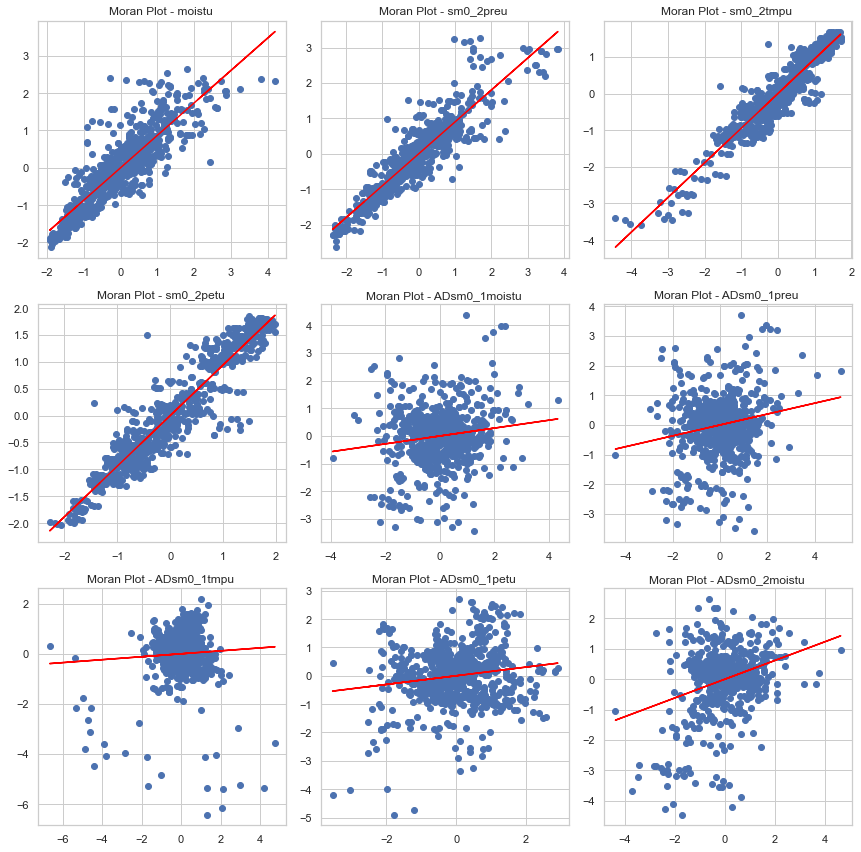

In [111]:
a = regiondata.columns
a = a[26:35]
# Weigths
w = lp.weights.KNN.from_dataframe(regiondata, k=8) #k nearest neighbour weights
w.tranform = "R" #row-standardization

f, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
for counter, i in enumerate(a):
    regiondata[f"{i}_lag"] = lp.weights.spatial_lag.lag_spatial(w, regiondata[i])
       
    #standardize the original variable and the lag
    regiondata[f"{i}_std"] = ( regiondata[i] - regiondata[i].mean() )\
                    / regiondata[i].std()
    regiondata[f"{i}_lag_std"] = ( regiondata[f"{i}_lag"] - regiondata[f"{i}_lag"].mean() )\
                    / regiondata[f"{i}_lag"].std()

    ax = axs[counter]
    ax.scatter(x=f"{i}_std", y=f"{i}_lag_std", data=regiondata)
    m, b = np.polyfit(x=regiondata[f"{i}_std"], y=regiondata[f"{i}_lag_std"], deg = 1)
    ax.plot(regiondata[f"{i}_std"], m*regiondata[f"{i}_std"]+b, color="red")

    ax.set_title(f'Moran Plot - {i} ')
    ax.xlabel=(f"{i}")
    ax.ylabel=(f"{i}")
    

plt.tight_layout()
plt.show()



In [100]:
a

Index(['moistu', 'sm0_2preu', 'sm0_2tmpu', 'sm0_2petu', 'ADsm0_1moistu',
       'ADsm0_1preu', 'ADsm0_1tmpu', 'ADsm0_1petu', 'ADsm0_2moistu'],
      dtype='object')

In [ ]:
## Elegant way using the Moran Function!!
#   # Set seed for reproducibility | why need seed for moran's I?
#   numpy.random.seed(123456)
#   # Calculate Moran's I for each variable
#   mi_results = [Moran(regiondata[variable], w) for variable in a]
#   # Display on table
#   table = pandas.DataFrame([(variable, res.I, res.p_sim) \
#                             for variable,res \
#                             in zip(cluster_variables, mi_results)
#                            ], columns=['Variable', "Moran's I", 'P-value']
#                           )\
#                 .set_index('Variable')
#   table

 - considering pairwise variation (because the Moran's plot only considers how one variable relates on space)

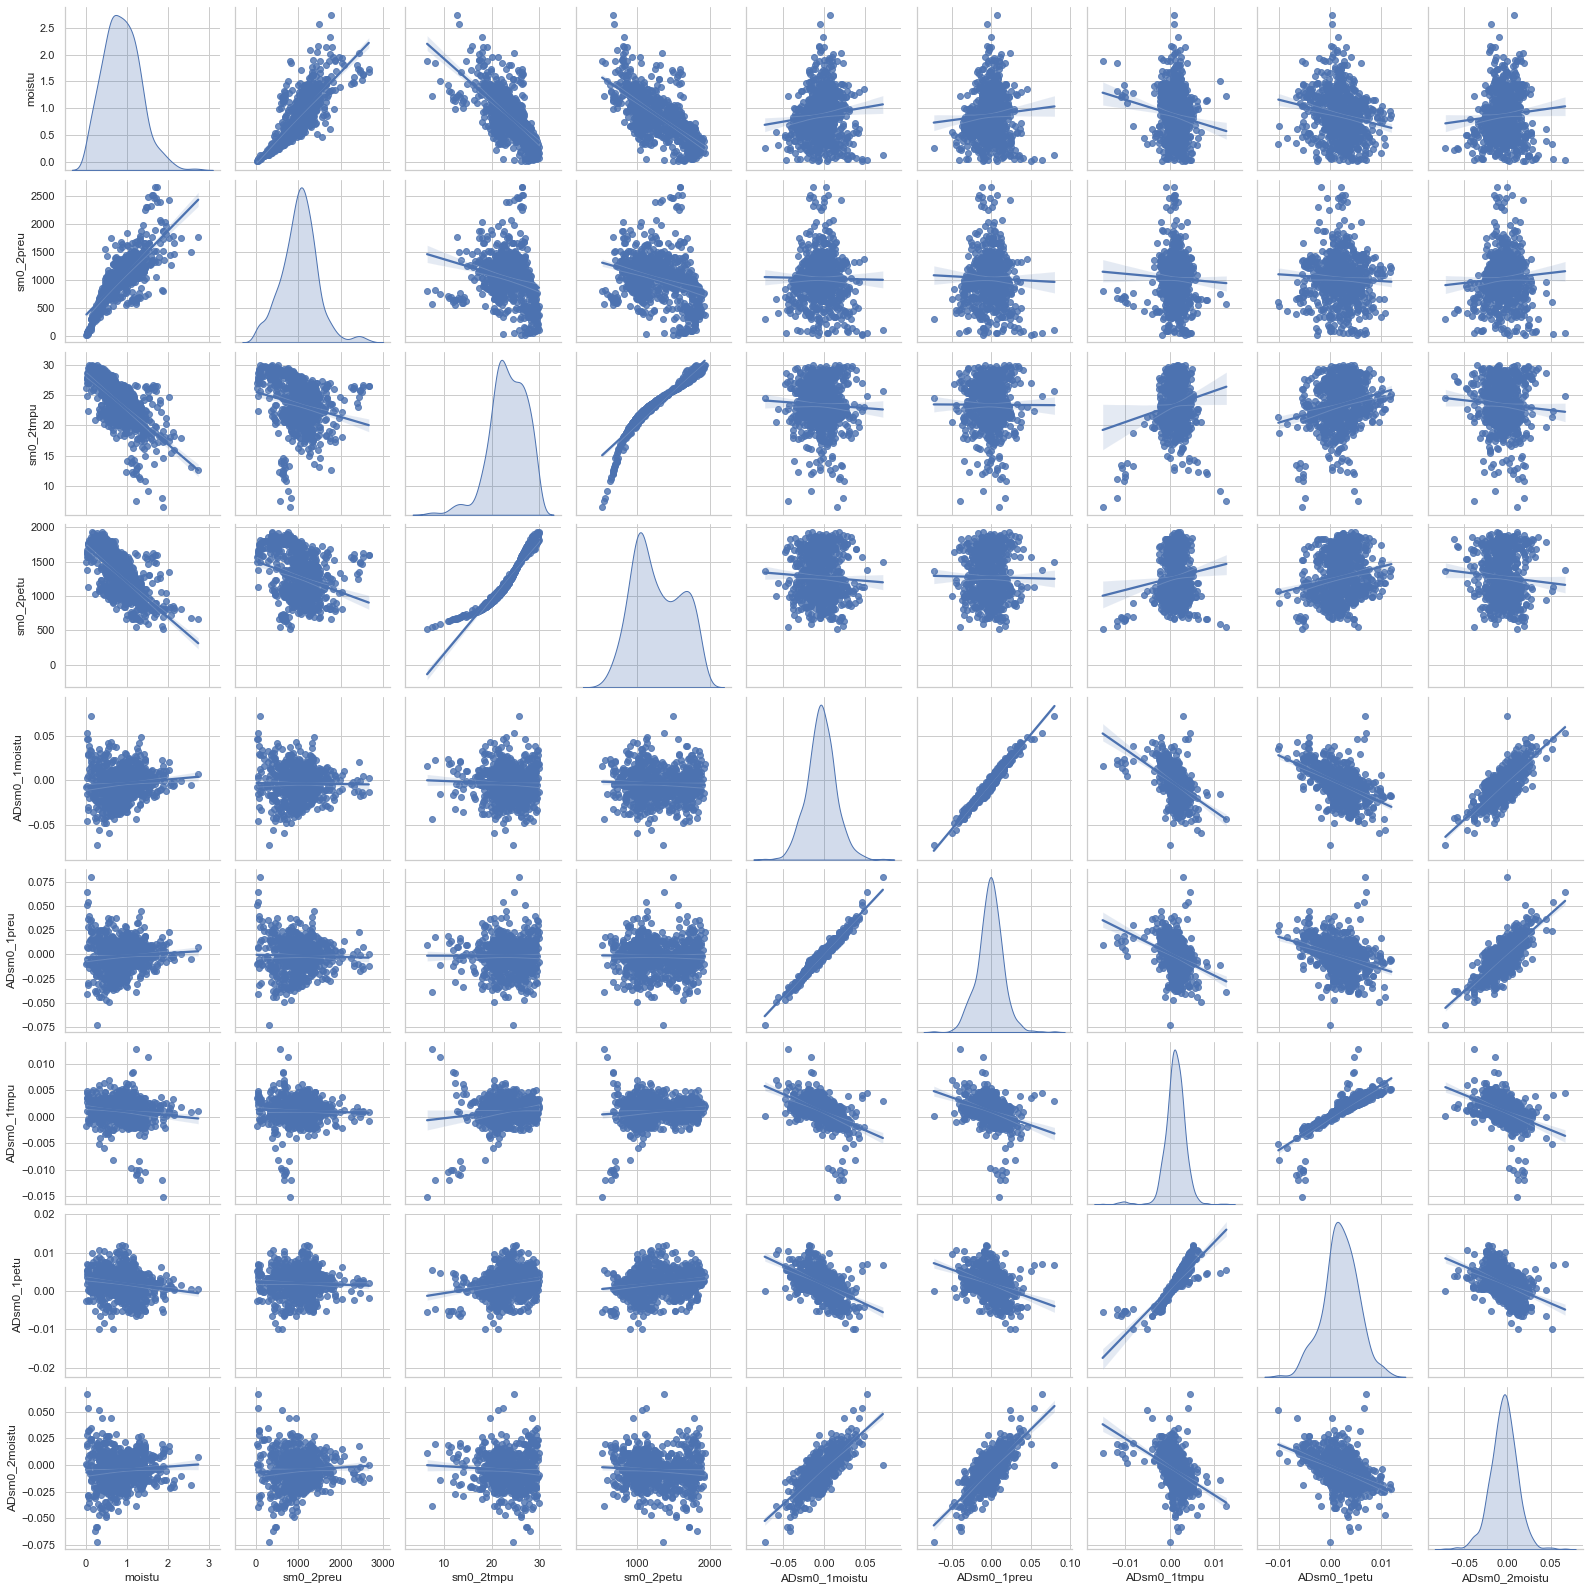

In [113]:
_ = sns.pairplot(regiondata[a], kind='reg', diag_kind='kde')

 - local measures of spatial autocorrelation (finding **where** clusters are)
     - Local Moran's I (continue here https://geographicdata.science/book/notebooks/07_local_autocorrelation.html )

### Point-Pattern analysis
- scatter-plot: use seaborn for scatter plot with histogram on the sides

<div class="alert alert-block alert-danger"><b>Note:</b> This chapter is about analysing the LOCATION of points, not the pattern of the values</div>

In [19]:
import seaborn as sns

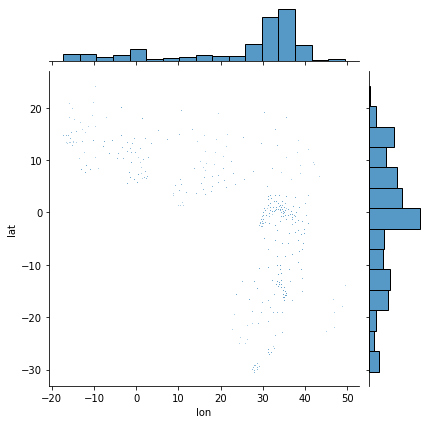

In [20]:
sns.jointplot(x='lon', y='lat', data=regiondata, s=0.5);

 - Hex-binning
 <div class="alert alert-block alert-danger"><b>Warning</b> Potentially meaningless since it will record for the same county multiple times - so rather than density of observations we get "density of census"</div>

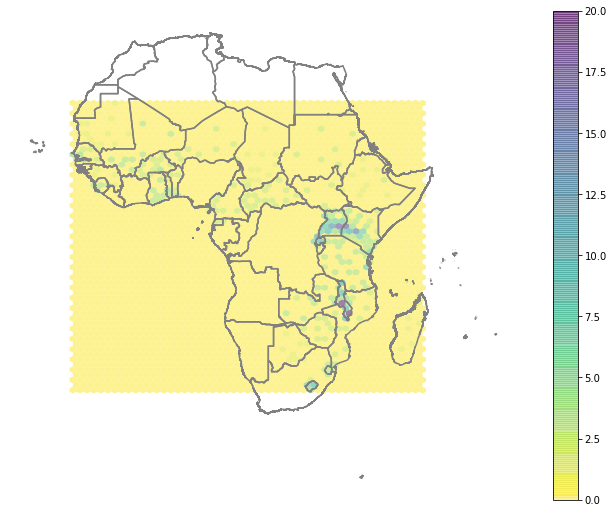

In [25]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))

# Generate and add hexbin with 50 hexagons in each 
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    regiondata['lon'], 
    regiondata['lat'],
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)
africa.boundary.plot(ax=ax, color='grey')
# Add basemap

#contextily.add_basemap(
#    ax, 
#    source=contextily.providers.CartoDB.Positron
#)

# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

plt.show()

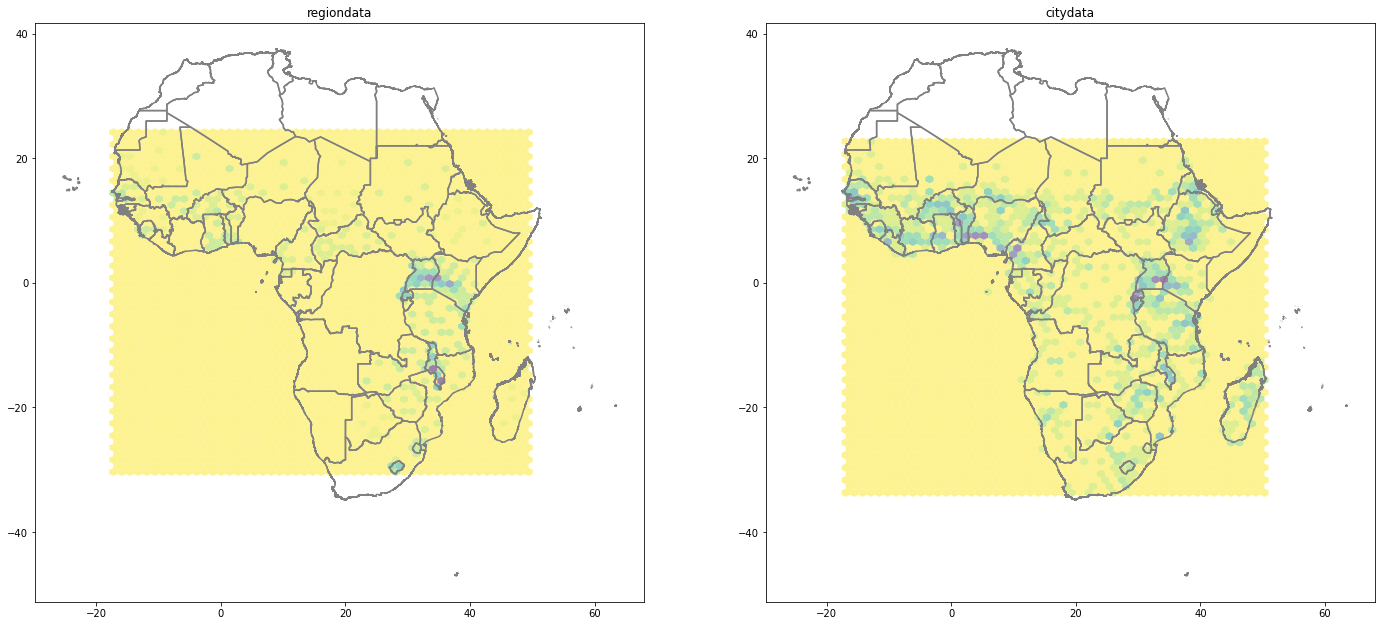

In [35]:
# Set up figure and axis
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 24))
axs = axs.flatten() #so can be called using single index

# Generate and add hexbin with 50 hexagons in each 
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
data = [regiondata, citydata]
title = ["regiondata", "citydata"]

for counter, i in enumerate(data):
    ax = axs[counter]
    hb = ax.hexbin(
        i['lon'], 
        i['lat'],
        gridsize=50, 
        linewidths=0,
        alpha=0.5, 
        cmap='viridis_r'
    )
    africa.boundary.plot(ax=ax, color='grey')
    ax.set_aspect('equal')
    ax.set_title(title[counter])

## Add colorbar
#plt.colorbar(hb)

plt.show()

 - Kernel Density Estimation (KDE)
     - Requires Seaborn

In [ ]:
#     # Set up figure and axis
#     f, ax = plt.subplots(1, figsize=(9, 9))
#     # Generate and add KDE with a shading of 50 gradients 
#     # coloured contours, 75% of transparency,
#     # and the reverse viridis colormap
#     seaborn.kdeplot(
#         db['x'], 
#         db['y'],
#         n_levels=50, 
#         shade=True,
#         alpha=0.55, 
#         cmap='viridis_r'
#     )
#     # Add basemap
#     contextily.add_basemap(
#         ax, 
#         source=contextily.providers.CartoDB.Positron
#     )
#     # Remove axes
#     ax.set_axis_off()

 - Following the analysis of inequality

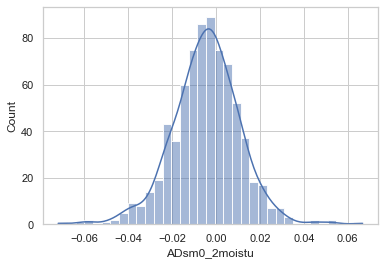

In [39]:
sns.set_theme(style='whitegrid')
sns.histplot(x=regiondata['ADsm0_2moistu'], kde=True)

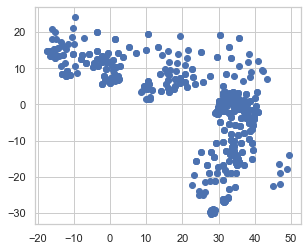

In [41]:
regiondata.plot()
#    column='ADsm0_2moistu', 
#    scheme='Quantiles', 
#    legend=True, 
#    edgecolor='none',
#    legend_kwds={'loc': 'lower left'}, 
#    figsize=(12, 12)
#)
#plt.show()

In [56]:
# reprojecting to Lambert Azimuthal Equal Area Equatorial

regiondata.set_crs("+proj=laea +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +units=m +no_defs") #https://spatialreference.org/ref/sr-org/8668/
regiondata.crs

In [52]:
regiondata.csr = "EPSG:4326"
regiondata.csr

'EPSG:4326'